# Directory Structure

* BDD consists of:
    * Steps (Given, When, Then, And, But): Located in feature files (`.feature`).
    * Steps Definitions: Located in Python files (`.py`).
* Behave handles several options for directory layout or folder structure.
* A `steps` directory is required in the directory which contains the feature files.

Two examples that meet the minimum requirement are:

**Test Layout Option 1**:

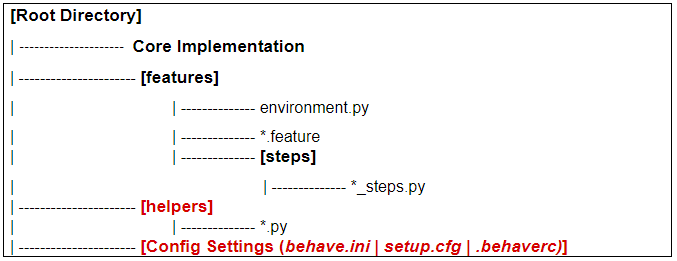


**Test Layout Option 2**:

```
[Root]

|--------------------Core Implementation

|--------------------[features]
                            |-------------- testcase1.feature
                            |-------------- testcase2.feature                          
                            |-------------- testcase3.feature
                            
|-------------------- [steps]
                            |-------------- steps.py                           
                            |-------------- more_python.py
```


# Feature File        

* **Feature**
    * Feature file has `.feature` extension.
    * A feature is equivalent to a story.
    * Starts with the `Feature:` keyword. 
    * Each feature file can have only one `Feature:` keyword.
* **Scenario/Test case**
    * Starts with the `Scenario:` keyword.
    * Can have multiple scenarios in a single feature file.
* **Steps**
* One or multiple lines with keywords: `Given`, `When`, `Then`, `And`, and `But`.
* Can have multiple steps in a single scenario.

## Examples

```gherkin
Feature: Attempt to logging in with invalid credentials


    Scenario: None existing user try to login

        Given I generate a random email address
        When I type random email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: User not found'


    Scenario: User try to login with wrong password

        Given I create a user
        When I type correct email
        When I type random password
        When I click on 'Login'
        Then I should see the text 'Error: Incorrect password'


    Scenario: User try to login with no password

        Given I create a user
        When I type correct email
        When I click on 'Login'
        Then I should see the text 'Error: Password field is empty'


    Scenario: User try to login with invalid format email

        When I type invalid format email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: Email is invalid format'
```

# Step Definition file

* Step definitions go under the `steps` directory.
    * The `steps` directory is required to be in the directory which contains the feature files.
    * Each step is represented as a Python function and must have any one of the decorators: `Given`, `When`, `Then`, `And`, or `But`.
* More `.py` files can exist in the `steps` folder that are not definitions. They will have logic and can get imported into the definition file.

## Example:

```python


from behave import given, when, then
import user
import assertions
import pdb

@given("I create a new user")
def create_new_user(context):
    """
    Step to create a new user.
    :return:
    """
    print("I am creating a new user")
    print(":) :) :) :) :) :)")
    print("More code would go here")
    # user.user_creator()
    prefix = context.config.userdata.get('prefix')

    pdb.set_trace()

@when("I type email")
def type_the_email(context):
    """
    Step to type email address in the email field
    :return:
    """

    print("Typing the email in the email field.")
    # email_field = driver.find_element('id', 'email')
    # email_field.send_keys('test@supersqa.com')
    print("Just finished typing the email :)")

@when("I type password")
def type_the_password(context):
    """
    Step to type email address in the password field
    :return:
    """
    print("Typing the password in the password field")
    # pass_field = driver.find_element_by_id('password')
    # pass_field.send_keys('123456')
    print("Just typed the password. :)")

@when("I click on 'Login'")
def click_login(context):
    """
    Step to click login
    :return:
    """
    print("I am clicking login!!!!")

@then("I should see the text Welcome")
def see_welcome_text(context):
    """
    Step to verify text is displayed
    :return:
    """
    assertions.assert_text_visible('Welcome')
    print("checking if 'Welcome' text is displayed")
    print("Yep it sure is there!!!")
    print("PASS!!!")

@when("I type correct email")
def type_correct_email(context):
    print("Typing correct email.")

```

# Execute behave via command-line

* Ways to run tests in **behave**:
    * One feature file at a time
    * All feature files in directory/sub-directory
    * Group of features/scenarios controlled by Tags
* Output of the test run is highly configurable.
    * By default, a passing test doesn't print to **stdout**, only failing test print the error in **stdout**.
    * To enable logging in **stdout**, use the **`--no-capture`** command line argument with **`behave`** command.
    * By default, output coloring is turned off in console/stdout.
    * To turn off output coloring, use the **`--no-color`** command line argument with **`behave`** command.
    * To turn off output coloring, use the **`--color`** command line argument with **`behave`** command.

**Assume you have following Test Layout**:

```
[Root]

|--------------------Core Implementation

|--------------------[features]
                            |-------------- testcase1.feature
                            |-------------- testcase2.feature                          
                            |-------------- testcase3.feature

                            |-------------------- [steps]
                                                    |-------------- steps.py                           
                                                    |-------------- more_python.py
```



## Run one feature file at a time

```
behave testcase1.feature

behave testcase1.feature --no-capture

behave testcase1.feature --no-capture --color
```

## Run all feature files 

* Behave is smart enough to find tests in sub-directories, as long as there is a `steps` directory one level up or in the same level.
* If there is a `steps` folder in the current directory then it will not go up to look for more definitions.

```
behave
```

# Displaying Output

* By default, Behave does not print the standard output in the console for tests that pass.
* Standards outputs are 'logging' statements or 'print; statement.
* If the test fails, all logging for the failed test will show.
* To force printing, use command lone argument `--no-capture`.

```
bheave --no-capture
```

> Note: use `behave --help` for more command line options

# `Given`, `When`, `Then`, `And`, or `But`

**`Given`**
- used for pre-condition
- setup actions
- no interaction

**`When`**
- interaction with application
- act on something

**`Then`**
- verification
- expectation

**`And` & `But`**
- represent the preceding keyword `Given`, `When` & `Then`.
- just a syntactic sugar for better semantics, expression, and easier readablity.


**Example: Without `And` & `But` keyword**

```gherkin
Feature: Taxes

Scenario: Tax should be calculated

Given I am a new user
Given I have a credit card
Given I am logged in
When I search for a headphone
When I add a headphone to my cart
Then the tax should be calculated
Then the subtotal should be correct
Then the total should be correct
```

**Example: With `And` & `But` keyword**

```gherkin
Feature: Taxes

Scenario: Tax should be calculated for logged in user

Given I am a new user
And I have a credit card
And I am logged in
When I search for a headphone
And I add a headphone to my cart
Then the tax should be calculated
And the subtotal should be correct
And the total should be correct
```

```gherkin
Feature: Taxes

Scenario: Tax should be calculated user not logged in

Given I am a new user
And I have a credit card
But I am not logged in
When I search for a headphone
And I add a headphone to my cart
Then the tax should be calculated
And the subtotal should be correct
And the total should be correct
But the order should not get placed
```

# Passing Parameters to Steps

* Often we need to pass values to steps.
* Values that will be passed as parameters to the step function.

**Examples**:

- Given I am at the **home** page
- Given I am at the **help** page
- Given I am at the **product** page

---

- When I add **5** items to the cart
- When I add **10** items to the cart

---

- Then the page **should** contain the text welcome
- Then the page **should not** contain the text welcome

---

- Then user buy the item with **credit** card
- Then user buy the item with **gift** card

---

* Behave offers a few ways to parse step parameters.
* It can use different types of parser:
    * As default, use the Python `parse` module.
    * It can also use Regular Expression (RegEx).
* The default parser is similar to how string formatting is done (Python 3 Style)
* Reminder of String formatting:
  
  ```
  >>> my_var = 'Python'
  >>> my_line = "I love the {lang} programming language".format(lang=my_var)
  >>> print(my_line)
  >>> I love the Python programming language
      
  ```

## Demo

For the steps below:
* Given I go to the **English** version of the site
* Given I go to the **French** version of the site

We have to define the step definition like this:

```
@give("I go to the {language} version of the site")
def go_to_site_version(context,lang)
    if language == "English":
        pass
    elif language == "French":
        pass
    else:
        pass
```

Best practice is to put the parameters in quotes for steps, like:
* Given I go to the **"English"** version of the site
* Given I go to the **"French"** version of the site

This improves the readability and tell that is a parameter passed to the step definition.

# Sharing data between steps

* Need to share information between steps frequently.
* We need data available globally.
* Python keeps variables alive only in the functions they are defined, unless the use of "global".
* Behave provides a feature that allows us to do just that.
* No need to declare global variables.
* Plus global variables are only good in one file.

For example:

```gherkin
Feature: Display email

Scenario: Email should display when logged in

    Given I create a random email
    When I login with the random email
    Then I should see the email on the page
```

* A random email is generated on the first step.
* How can we use that email on the next step to login?
* Need a way to store the value.


## context variable

* The variable **`context`** is an instance of a class and is used to store contextual data during the test run.
* To store value globally just use: `context.<variable_name> = value`
* Applicable for steps within Scenario only.

**Example**:
* store value for **rand_eamil**: `context.rand_email = 'test_user@test.com'`
* use the `rand_eamil` in a different function.
  ```
  >>> print context.rand_email
  >>> test_user@test.com
  >>> email_field.send_keys(context.rand_email)
  ```

**Important Notes**:
* Behave uses `context` to store lots of information used for running tests (**do not use those names**)
* Examples:
    * `context.feature` stores the Feature.
    * `context.scenario` stores the Scenarios.
* Avoid such keywords (refer to API documentation)
* Check if the variable you want to use is being used by 'behave' by doing: **`>>> your_var in context`**
* Note that the `context` variable can share data only between steps within a scenario. It cannot share data between scenarios.

# Packaging modules to avoid import issues

## Folder structure

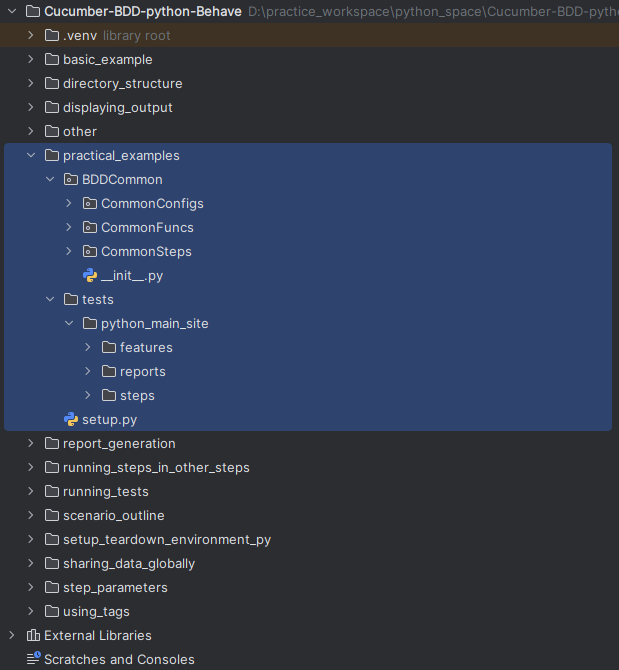

## `setup.py`

```python

# from distutils.core import setup
from setuptools import setup
setup(name='PythonBDDtutorial',
      version='1.0',
      description='Python BDD Package Installation',
      author='Kiranmoy Paul',
      author_email='xyz@gmail.com',
      url='https://www.supersqa.com/',
      packages=[
            'BDDCommon',
            'BDDCommon.CommonFuncs',
            'BDDCommon.CommonSteps',
            'BDDCommon.CommonConfigs'
      ],
     )



```

## installing packages to make packages available globally

1. Install setuptools: **`pip install setuptools`**
2. Run: **`python setup.py install`**

> Note: Installing packages will add them to the Python path so that they're available globally.

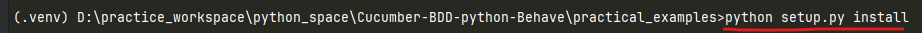

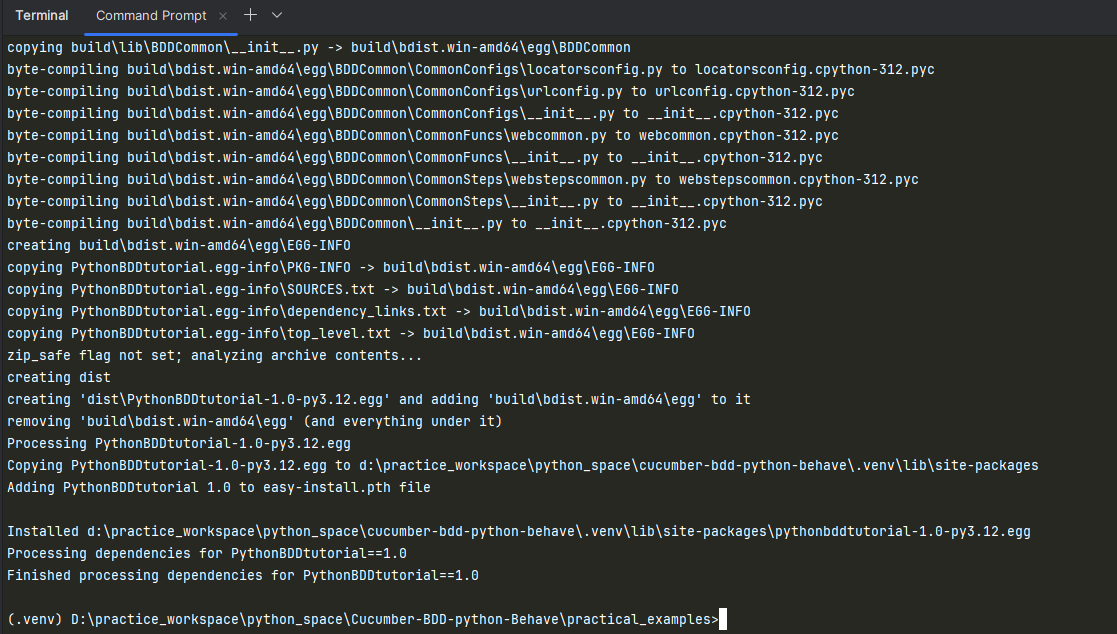



# Setup and Teardown

* Setup is a set of actions taken **before** each Feature, Scenario, or Step.
* Teardown is a set of actions taken **after** each Feature, Scenario, or Step.
* Behave supports this functionality by implementing a file called **`environment.py`**.
* Examples of **Setup** are:
    * Opening browser
    * Creating a Database
    * Creating a User
    * Creating files to be used for the test
    * Configuring things like logging, browser type, ...
* Examples of **Teardown** are:
    * Exact opposites of **Setup**
    * Closing browser
    * Deleting database, user, files
    * Reverting whatever was changed from the original state.
* All the setup and teardown functions should be defined in the **`environment.py`** file.
* The **`environment.py`** file must be in the same directory as the **`steps`** directory (not inside the `steps` directory).
* The file name contains functions named as follows:

| SETUP METHODS                        | TEAR DOWN METHODS                   |
|---|---|
| `before_feature(context, feature)`   | `after_feature(context, feature)`   | 
| `before_scenario(context, scenario)` | `after_scenario(context, scenario)` | 
| `before_step(context, step)`         | `after_step(context, step)`         | 
| `before_tag(context, tag)`           | `after_tag(context, tag)`           | 
| `before_all(context)`                | `after_all(context)`                | 

## `environment.py`

```python


import logging as logger

import pdb


def before_all(context):
    logger.info("AAAAAA - BEFORE ALL")
    logger.info("")
    # pdb.set_trace()

def after_all(context):
    logger.info("AAAAA- AFTER ALL")
    logger.info("AAAAA- AFTER ALL")
    logger.info("AAAAA- AFTER ALL")
    # pdb.set_trace()


def before_feature(context, feature):

    all_tags = feature.tags

    if 'smoke' in all_tags:
        context.smoke = True

    logger.info("FFFFF - BEFORE FEATURE")
    logger.info("")

def after_feature(context, feature):


    logger.info("FFFFF - AFTER FEATURE")
    logger.info("")


def before_scenario(context, scenario):

    logger.info("SSSSSS - BEFORE SCENARIO")
    logger.info("")
    if scenario.name == 'checkout with new user':
        # setup for the scenario
        # call()
        pass


def after_scenario(context, scenario):

    logger.info("SSSS - AFTER SCENARIO")
    logger.info("")
    #pdb.set_trace()


def before_step(context, step):

    logger.info("STSTST - BEFORE STEP")
    logger.info("")

def after_step(context, step):

    if step.status.name == 'failed':
        # take screen shot
        pass

def before_tag(context, tag):

    logger.info("TTTT - BEFORE TAG")
    logger.info("")

def after_tag(context, tag):
    logger.info("TTTTT - AFTER TAG")
    logger.info("")


```

# Background keyword

* **`Background`** is another keyword like **`Feature`** and **`Scenario`**.
* **`Background`** scetions is just like a Scenario section but only 1 **`Background`** section is allowed per Feature file.
* **`Background`** section is placed before the first Scenario.
* The **`Background`** runs before each Scenario BUT after **`before_scenario(context, scenario)`** method in **`environment.py`**.
* Just like **`before_scenario(context, scenario)`**, **`Background`** section is used to set up information before each scenario of the feature file.
* **Scope**:
* **`before_scenario(context, scenario)`** executes before each scenario of all feature files.
* **`Background`** executes before each scenario of the specific feature file where it is being defined, not all feature files.

**Example**:

```gherkin

Feature: Checkout with multiple items

    Background: Create a user with a valid credit card
        Given I create a new user
        And I add a valid credit card to the user

    Scenario: Subtotal should be correct
        Given I log in with the new user
        When I add 2 different items to my cart 
        Then the subtotal of my cart should be correct

    Scenario: Should see the list of items in the cart
        Given I log in with the new user
        When I add 2 different items to my cart 
        Then I should see the detailed list of my items in the cart

```

# Scenario Outline

* **`Scenario Outline`** is used:
    * To be organized
    * To write less code (Gherkin)
    * To group test cases
* When we need to run the same test with different parameters.
* Instead of repeating tests with different parameters, we use **`Scenario Outline`**.

## Example without `Scenario Outline`

```gherkin

Feature: Create a user with a bad password

Scenario Outline: try password "too long"
    Given I am at create user page
    When I type "too long" password
    Then I should see error message

Scenario Outline: try password "too short"
    Given I am at create user page
    When I type "too short" password
    Then I should see error message

Scenario Outline: try password "all numbers"
    Given I am at create user page
    When I type "all numbers" password
    Then I should see error message

Scenario Outline: try password "all letters"
    Given I am at create user page
    When I type "all letters" password
    Then I should see error message
```

## Example with `Scenario Outline`

```gherkin

Feature: Create a user with a bad password

Scenario Outline: try password "<type>"
    Given I am at create user page
    When I type "<type>" password
    Then I should see error message
Examples:
    | type         |
    | too long     |
    | too short    |
    | all numbers  |
    | all letters  |

```

# Using Tags

* Tags are used to control test execution.
* Tags applied to a Feature will be applicable to all the Scenarios under the Feature.
* Tags applied to a Scenario only applicable to that Scenario.
* Tags are any words including underscore.
* Multiple Tags can be applied to **Feature** or **Scenario** separated by spaces.
* Examples: `@smoke`, `@regression`, `@DISABLED`, `@checkout_flow`, etc.

**How to execute the test with tags?**
```
behave example.feature --tags=regression

OR

behave example.feature --tags regression
```

**Multiple tags usage**

Let's say you have tags @aa, @bb, & @cc. They're applied to different scenarios in different comnbinations.
* **`behave --tags=aa,bb`**: run scenarios tagged aa **OR** bb.
* **`behave --tags=aa --tags=bb`**: run scenarios tagged both aa **AND** bb.
* **`behave --tags=~aa`**: run everything except tag aa (NOT aa).
* **`behave --tags=aa,bb --tags=~cc`**: (aa OR bb) AND NOT cc

**Additional command line options**

* To hide the scenarios that were skipped use command line argument: **`k`** or **`--no-skipped`**
* By default it should be turned on but if it is configured to be turned off, you can show it by: **`bheave --show-skipped`**
* To get more information about tags, do: **`behave --tags-help`**